# Inter-atomic Potential for Silica and Water
The Vashishta potential (Vashishta, 1990) consists of a two-body and a three-body term, and describes effects like steric repulsion, Coulomb interaction, charge-dipole interaction, van der Waals interaction, and covalent bond bending and stretching. It has proven to be able to model fundamental features in silica and water, and is today the _de facto_ standard potential for modeling the molecular behavior of the substances. 

However, when looking at the interactions between silica and water, the Vashishta potential breakes down due to oxygen correlations. For that reason, Wang et al. (Wang, 2019) has introduced a new potential based on the Vashishta potential, but which also takes care of the number of particles around the oxygen atoms. In more detail, this improved potential exploits the Branicio formulation (Branicio, 2009) of the Vashistha potential, which is also the one implemented in LAMMPs. 

## The Original Vashishta Potential
The original Vashishta potential was introduced by Vashishta et al. in 1990, and was made to model AX$_2$-type glasses (like SiO$_2$). It takes the form
\begin{equation}
    V = \sum_{i<j}^NV^{(2)}(r_{ij})+\sum_{i<j<k}^NV^{(3)}(r_{ij},r_{jk},r_{ik}),
\end{equation}
where $r_{ij}=|\boldsymbol{r}_{i}-\boldsymbol{r}_{j}|$ is the relative distance between particle $i$ and $j$. The first term is the two-body term, and the second term is the three-body term. 

### The two-body term
The two-body term reads
\begin{equation}
    V_{ij}^{(2)}(r)=\underbrace{\frac{H_{ij}}{r^{\eta_{ij}}}}_{\text{steric repulsion}}+\underbrace{\frac{Z_iZ_j}{r}}_{\text{Coulomb interaction}}-\underbrace{\frac{\alpha_iZ_j^2+\alpha_jZ_i^2}{2r^4}e^{r/r_{4s}}}_{\text{charge dipole interaction}}.
\end{equation}

Here we have five variational parameters:
- $H_{ij}$ - strength of steric interaction
- $\eta_{ij}$ - exponent of steric repulsion
- $Z_i$ - charge of i-th ion
- $\alpha_i$ - electronic polarizability of the i-th ion
- $r_{4s}$ - decay length $\rightarrow$ 4.43Å


### The three-body term
The three-body term reads
\begin{equation}
    V_{ijk}^{(3)}=\underbrace{B_{ijk}}_{\text{strength}}\underbrace{f(r_{ij},r_{ik})}_{\text{bond stretching}}\underbrace{p(\theta_{jik}\overline{\theta}_{jik})}_{\text{bond bending}},
\end{equation}
with
\begin{equation}
    f(r_{ij},r_{ik})=
    \begin{cases}
        \exp(\frac{l}{r_{ij}-r_0)}-\frac{l}{r_{ik}-r_0)})\qquad\text{if}\quad &r_{ij},r_{ik}<r_0\\
        0 &r_{ij},r_{ik}>r_0,
    \end{cases}
\end{equation}
and
\begin{equation}
    p(\theta_{jik},\overline{\theta}_{jik})=(\cos(\theta_{jik})-\cos(\overline{\theta}_{jik}))^2.
\end{equation}

Here we have four additional variational parameters:

- $r_0$ - cutoff distance for the three-body interaction
- $l$ - exponent of bond stretching
- $\overline{\theta}$ - equilibrium angle
- $B$ - strength of three-body correlations

So in total, the potential takes nine parameters that need to be set carefully in order to get a realistic potential.

## The Branicio formulation of the Vashishta potential
The Vashishta potential was improved by Branicio et al. in 2009, adding support for the van der Waals interactions and screened Coulomb interaction. 

### The two-body term
The improved two-body interaction reads
\begin{equation}
    V_{ij}^{(2)}(r)=\frac{H_{ij}}{r^{\eta_{ij}}}+\frac{Z_iZ_j}{r}e^{-r/\lambda_1}-\frac{D_{ij}}{r^4}e^{-r/\lambda_4}-\frac{w_{ij}}{r^6},
\end{equation}
where
\begin{equation}
    H_{ij}=A(\sigma_i-\sigma_j)^{\eta_{ij}},
\end{equation}
and
\begin{equation}
    D_{ij}=\frac{\alpha_iZ_j^2+\alpha_jZ_i^2}{2}.
\end{equation}

This two-body term has eight variational parameters:

- $\eta_{ij}$ - exponent of steric repulsion
- $Z_i$ - charge of i-th ion
- $A$ - strength of steric repulsion
- $\sigma_i$ - 
- $\alpha_i$ - electronic polarizability of the i-th ion
- $\lambda_1$ - Coulomb screening strength
- $\lambda_4$ - decay length $\rightarrow$ 4.43Å
- $w_{ij}$ - van der Waals strength

### The three-body term
The three-body term reads
\begin{equation}
    V_{ijk}^{(3)}=\Gamma(r_{ij},r_{ik})\Lambda(\theta_{jik}),
\end{equation}
with 
\begin{equation}
    \Gamma(r_{ij},r_{ik})=B_{jik}\exp(\frac{\gamma}{r_{ij}-r_0}+\frac{\gamma}{r_{ik}-r_0})\Theta(r_0-r_{ij})\Theta(r_0-r_{ik}),
\end{equation}
\begin{equation}
    \Theta(x)=
    \begin{cases}
        1\qquad\text{if}\quad & x\leq 0\\
        0\qquad\text{if}\quad & x>0,
    \end{cases}
\end{equation}
\begin{equation}
    \Lambda(\theta_{jik})=\frac{(\cos(\theta_{jik})-\cos(\theta_{0}))^2}{1+C(\cos(\theta_{jik})-\cos(\theta_0))^2}.
\end{equation}

Here, we again have four variational parameters:

- $r_0$ - cutoff distance for the three-body interaction
- $\gamma$ - exponent of bond stretching
- $\theta_0$ - equilibrium angle
- $B$ - strength of three-body correlations
- $C$ - denominator factor

## The USC Silica-Water Potential
The silica-water potential exploits the Vashishta potential. The two-body term is modified to include the number of atoms of certain types around the oxygen atoms:
\begin{equation}
    V_{ij}^{(2)}(r_{ij})=V_{ij}^{(2),\text{silica}}(r_{ij})(1-f_{ij})+V_{ij}^{(2),\text{water}}(r_{ij})f_{ij},
\end{equation}
where $V_{ij}^{(2),\beta},\beta\in\{\text{silica},\text{water}\}$ is the potential formulated by Branicio. $f_{ij}$ is dependent on the number of Hydrogen and Silicon atoms only,
\begin{equation}
    f_{ij}(n_i^{\text{Si}}, n_i^{\text{H}}, n_j^{\text{Si}}, n_j^{\text{H}})=\frac{n_i^{\text{H}}+n_j^{\text{H}}}{n_i^{\text{Si}}+n_i^{\text{H}}+n_j^{\text{Si}}+n_j^{\text{H}}},
\end{equation}
where
\begin{equation}
    n_i^{\beta}=\sum_{k\in\beta}\Theta(r_{ik})\qquad\beta\in\{\text{H},\text{Si}\},
\end{equation}
\begin{equation}
    \Theta(r)=
    \begin{cases}
        1 & r\leq R_{\beta}-D_{\beta}\\
        \frac{\sin(\pi(r-R_{\beta}+D_{\beta})/D_{\beta})}{2\pi} -\frac{r-R_{\beta}+D_{\beta}}{2D_{\beta}} \quad & R_{\beta}-D_{\beta}\leq r < R_{\beta} + D_{\beta} \\
        0 & R_{\beta}+D_{\beta} < r.
    \end{cases}
\end{equation}

### Investigating the potential
We now implement the potential in Python.

In [199]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from jax import grad, jit, random
import jax.numpy as jnp

In [200]:
def distance(xi, yi, zi, xj, yj, zj):
    '''
    Finds the distance between particle i and j
    '''
    return jnp.sqrt((xi-xj)**2+(yi-yj)**2+(zi-zj)**2)

In [201]:
def Theta(xi, yi, zi, xj, yj, zj, R=1.5, D=0.2):
    '''
    Determines whether a particle i is 
    around a particle j. 
    
    Arguments:
    ----------
    xi,yi,zi,xj,yj,zj   {float} : Coordinates
    R                   {float} : Distance around particle i
    D                   {float} : Width of decaying part
    '''
    r = distance(xi, yi, zi, xj, yj, zj)
    start = R - D
    end   = R + D
    if r <= start:
        return 1
    elif start <= r < end:
        return - (r - end) / (2 * D) + np.sin(jnp.pi*(r-end)/D)/(2 * jnp.pi)
    else:
        return 0

In [202]:
def cross_section(r, R=1.5, D=0.2):
    '''
    Cross section of Theta.
    '''
    start = R - D
    end   = R + D
    if r <= start:
        return 1
    elif start <= r < end:
        return - (r - end) / (2 * D) + jnp.sin(jnp.pi*(r-end)/D)/(2 * jnp.pi)
    else:
        return 0

Start with showing heatmap of Theta

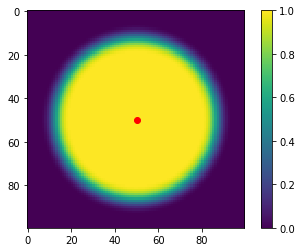

In [203]:
N = 100
R = 1.5
D = 0.3
x = jnp.linspace(-2, 2, N)
G = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        G[i,j] = Theta(0,0,0,x[i],x[j],0,R=R,D=D)

plt.plot(50,50,'or')
plt.imshow(G)
plt.colorbar()
plt.show()

Then express cross-section of Theta

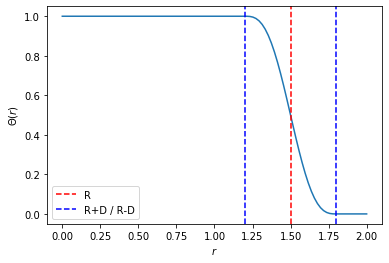

In [204]:
x = jnp.linspace(0, 2, N)
G = np.zeros(N)
for i in range(len(x)):
    G[i] = cross_section(x[i],R=R,D=D)
plt.plot(x, G)
plt.axvline(R,color='r',linestyle='--', label="R")
plt.axvline(R-D,color='b',linestyle='--', label="R+D / R-D")
plt.axvline(R+D,color='b',linestyle='--')
plt.xlabel("$r$")
plt.ylabel("$\Theta(r)$")
plt.legend(loc='best')
plt.show()

### Computing forces
The interaction forces are found from $\boldsymbol{F}=-\nabla V$. Let's try to do this automatically.

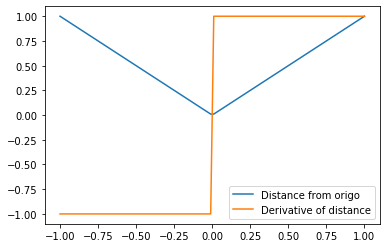

In [205]:
grad_distance = grad(distance, argnums=0)
N = 100
x = jnp.linspace(-1,1,N)
y = np.zeros(N)
for i in range(N):
    y[i] = grad_distance(float(x[i]),0,0,0,0,0)
plt.plot(x, distance(x,0,0,0,0,0),label="Distance from origo")
plt.plot(x, y,label="Derivative of distance")
plt.legend(loc='best')
plt.show()

In [207]:
grad_Theta = grad(Theta, argnums=0, holomorphic=True)
print(grad_Theta(0.1,0,0,0,0,0))
x = jnp.linspace(-2,2,N)
y = np.zeros(N)
g = np.zeros(N)
for i in range(N):
    y[i] = Theta(x[i],0,0,0,0,0)
    g[i] = grad_Theta(x[i],0,0,0,0,0)
plt.plot(x, y)
plt.plot(x, g)
plt.show()

0.0


Exception: Tracer can't be used with raw numpy functions. You might have
  import numpy as np
instead of
  import jax.numpy as np

### Number of atoms around an Oxygen atom


In [91]:
def n(xi,yi,zi,x1,y1,z1,x2,y2,z2,x3,y3,z3):
    '''
    Number of atoms of type beta around oxygen atom at 
    coordinate (xi,yi,zi).
    '''
    number_of_atoms_of_type_beta = 3
    number_of_atoms_around = 0

    number_of_atoms_around += Theta(xi,yi,zi,x1,y1,z1)
    number_of_atoms_around += Theta(xi,yi,zi,x2,y2,z2)
    number_of_atoms_around += Theta(xi,yi,zi,x3,y3,z3)
    return number_of_atoms_around

In [95]:
grad_n = grad(n, argnums=0, holomorphic=True)
x = jnp.linspace(-2,2,N)
key = random.PRNGKey(1539)
r = random.uniform(key, minval=-1, maxval=1, shape=(11,1))
y = jnp.zeros(N)
g = jnp.zeros(N)
for i in range(N):
    y[i] = n(x[i],r[0],r[1],r[2],r[3],r[4],r[5],r[6],r[7],r[8],r[9],r[10])
    g[i] = grad_n(x[i],r[0],r[1],r[2],r[3],r[4],r[5],r[6],r[7],r[8],r[9],r[10])
plt.plot(x, y)
plt.plot(x, g)
plt.show()

[3.0925612]
[2.5248754]
[1.712717]


TypeError: '<class 'jax.interpreters.xla.DeviceArray'>' object does not support item assignment. JAX arrays are immutable; perhaps you want jax.ops.index_update or jax.ops.index_add instead?